In [15]:
# Import necessary libraries
import pandas as pd           # For handling datasets
import numpy as np            # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns


# Configure matplotlib for inline display (for Jupyter Notebook)
%matplotlib inline



In [16]:
df = pd.read_csv("GenZ_DatingApp_Data.csv")


In [17]:
df.head()

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [18]:
df.isnull().sum()


User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64

In [19]:
df.fillna("Unknown", inplace=True)  # Replace missing values with "Unknown"


In [20]:
df.drop_duplicates(inplace=True)


In [21]:
df['Gender'] = df['Gender'].str.lower()  # Convert gender column to lowercase


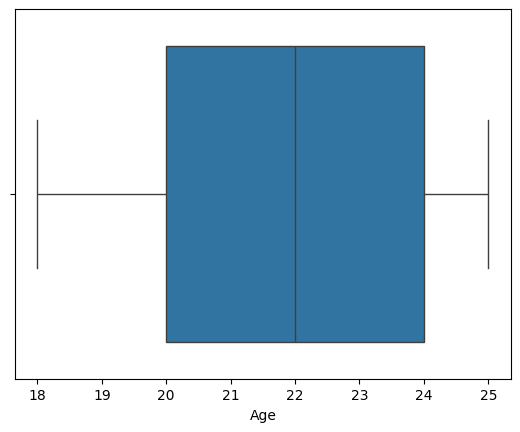

In [22]:
# Boxplot to visualize outliers
sns.boxplot(x=df['Age'])
plt.show()

# Remove outliers using IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Age'] >= (Q1 - 1.5 * IQR)) & (df['Age'] <= (Q3 + 1.5 * IQR))]


In [23]:
df.to_csv("cleaned_data_v1.csv", index=False)
